In [53]:
#importing the required libraries.
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, f1_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
#Getting data into DataFrame.
data = pd.read_csv("Data_4.csv")

In [139]:
data.shape

(3264, 46)

In [133]:
data.drop("Unnamed: 0", axis = 1, inplace = True)

In [134]:
#Seperating features and target variable.
X = data.drop("Bankrupt?", axis = 1)
Y = data["Bankrupt?"]

In [6]:
#Getting the MinMaxScaler instance 
Sc = MinMaxScaler()

In [135]:
X_scaled = pd.DataFrame(data = Sc.fit_transform(X), columns = X.columns)

In [136]:
xtrain, xtest, ytrain, ytest = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 1)

In [114]:
#Getting the LogisticRegression() instance with default parameters for baseline performance
LR = LogisticRegression(max_iter = 500)
DT = DecisionTreeClassifier(max_depth = 8)
NB = GaussianNB()

In [141]:
#Fitting te model
model_baseline = LR.fit(xtrain, ytrain)

In [140]:
xtrain.shape

(2284, 45)

In [138]:
Y.value_counts()

0    2720
1     544
Name: Bankrupt?, dtype: int64

In [142]:
#Getting the predictions for train data
y_pred_train = model_baseline.predict(xtrain)

In [143]:
accuracy_score(ytrain, y_pred_train)

0.9176882661996497

In [144]:
print(classification_report(ytrain, y_pred_train))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1890
           1       0.82      0.68      0.74       394

    accuracy                           0.92      2284
   macro avg       0.88      0.82      0.85      2284
weighted avg       0.91      0.92      0.91      2284



In [150]:
xtest.shape

(980, 45)

In [160]:
print(classification_report(ytrain, y_pred_train))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1890
           1       0.82      0.68      0.74       394

    accuracy                           0.92      2284
   macro avg       0.88      0.82      0.85      2284
weighted avg       0.91      0.92      0.91      2284



In [147]:
fpr_train, tpr_train, th_train = roc_curve(ytrain, y_pred_train)

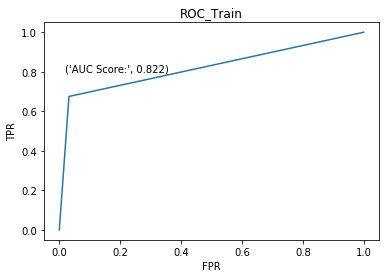

In [148]:
plt.plot(fpr_train, tpr_train)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.text(x = 0.02, y = 0.8, s = ("AUC Score:", round(roc_auc_score(ytrain, y_pred_train), 3)))
plt.title("ROC_Train")
plt.show()

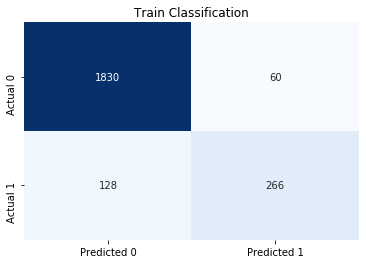

In [149]:
sns.heatmap(pd.DataFrame(data = confusion_matrix(ytrain, y_pred_train), index = ["Actual 0", "Actual 1"], columns = ["Predicted 0", "Predicted 1"]), annot = True, fmt = "g", cbar = False, cmap = "Blues")
plt.title("Train Classification")
plt.show()

In [99]:
roc_auc_score(ytrain, y_pred_train)

0.8279993015540423

In [151]:
#Getting the predictions
y_pred_test = model_baseline.predict(xtest)

In [152]:
accuracy_score(ytest, y_pred_test)

0.9285714285714286

In [158]:
print(classification_report(ytest, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       830
           1       0.85      0.65      0.73       150

    accuracy                           0.93       980
   macro avg       0.89      0.81      0.85       980
weighted avg       0.93      0.93      0.92       980



In [154]:
confusion_matrix(ytest, y_pred_test)

array([[813,  17],
       [ 53,  97]], dtype=int64)

In [155]:
fpr_test, tpr_test, th_test = roc_curve(ytest, y_pred_test)

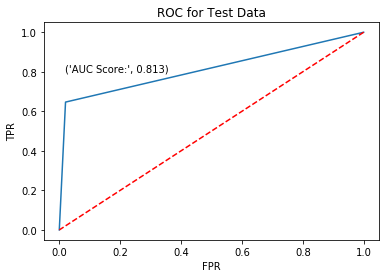

In [163]:
plt.plot(fpr_test, tpr_test)
plt.plot([1,0], [1,0], "r--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.text(x = 0.02, y = 0.8, s = ("AUC Score:", round(roc_auc_score(ytest, y_pred_test), 3)))
plt.title("ROC for Test Data")
plt.show()

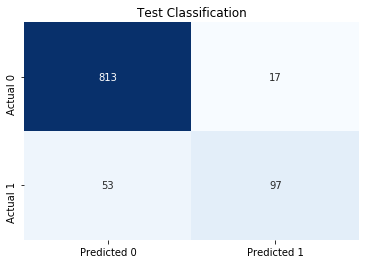

In [157]:
sns.heatmap(pd.DataFrame(data = confusion_matrix(ytest, y_pred_test), index = ["Actual 0", "Actual 1"], columns = ["Predicted 0", "Predicted 1"]), annot = True, fmt = "g", cbar = False, cmap = "Blues")
plt.title("Test Classification")
plt.show()